# Bayes' Theorem applied on coin flips

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We are going to plot the posterior distribution $p(H|D,I)$ for our coin-flip experiment.  For the cases $D_1=h$, $D_2=h,h$, and $D_3=h,h,t$ we saw that $$p(H|D_1,I) \propto H$$ $$p(H|D_2,I) \propto H^2$$ $$p(H|D_3,I) \propto H^2 (1-H)$$  The right hand side is proportional to the binomial distribution.  We will see this more formally later, but let's go ahead and use the `scipy` function `stats.binom.pmf` to plot this.  More documentation on `scipy.stats.binom` is here:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

`stats.binom.pmf` takes three arguments $(k, n, p)$ and returns the probability of $k$ successes (heads, in our case) given $n$ trials given $p$ as the probability of successes ($H$).

In [2]:
from scipy.stats import binom

In [3]:
# make a grid of H = [0,1]
H = np.arange(0, 1.02, 0.02)
H

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [4]:
# binom.pmf(k, n, p)
y1 = binom.pmf(1, 1, H)  # D=h
y2 = binom.pmf(2, 2, H)  # D=h,h
y3 = binom.pmf(2, 3, H)  # D=h,h,t

Text(0, 0.5, '$p(D|H,I)$ (likelihood)')

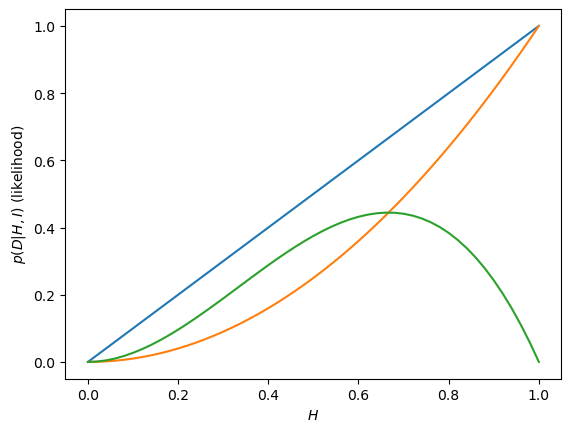

In [5]:
plt.plot(H, y1)
plt.plot(H, y2)
plt.plot(H, y3)
plt.xlabel("$H$")
plt.ylabel("$p(D|H,I)$ (likelihood)")

Let's be a bit more careful/formal and actually define our flat prior.  Here is a function that takes an array `x` and returns 1.0 if `x` is between [0,1]; otherwise returns 0.0.

For those who don't know, `enumerate` is a very useful function used in a `for` loop.  It takes an array and returns its index and value, like this:

In [6]:
x = ["a", "b", "c"]
for i, xval in enumerate(x):
    print(i, xval)

0 a
1 b
2 c


In [7]:
def priorFlat(x):

    # Function that takes an array x and return an array of the
    # same size filled with 1.0 (if 0<=x<=1) and 0.0 (otherwise).
    # There are other ways to do this, but this works fine.

    prior = np.empty_like(x)
    for i, xval in enumerate(x):
        if xval>=-0.0001 and xval<=1.0001:
            prior[i] = 1.00
        else:
            prior[i] = 0.00
    return prior

In [8]:
def priorFlat2(x):

    # An alternative to priorFlat that returns the same thing.

    prior = np.where(x>=1.0001, 0, 1)
    prior = np.where(x<=-0.0001, 0, prior)
    
    return prior

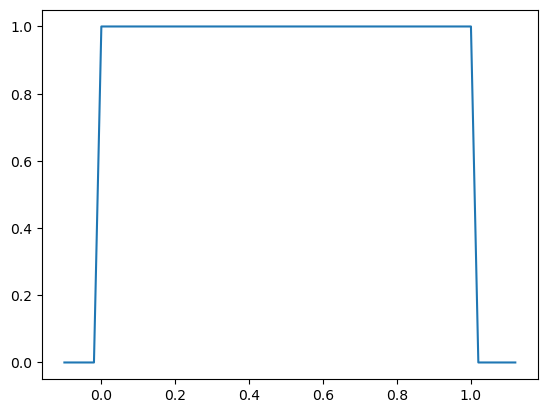

In [9]:
testH = np.arange(-0.1, 1.12, 0.02)
plt.plot(testH, priorFlat(testH))

Now let's multiply the likelihood with the flat prior.

In [10]:
p1 = priorFlat(H)*binom.pmf(1, 1, H)  # D=h
p2 = priorFlat(H)*binom.pmf(2, 2, H)  # D=h,h
p3 = priorFlat(H)*binom.pmf(2, 3, H)  # D=h,h,t

Text(0, 0.5, '$p(H|D,I)$ (posterior)')

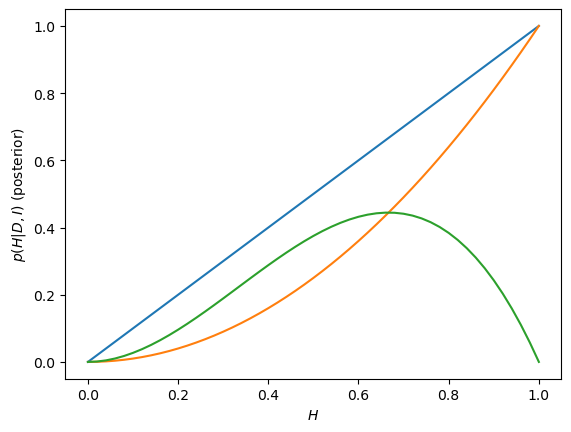

In [11]:
plt.plot(H, p1)
plt.plot(H, p2)
plt.plot(H, p3)
plt.xlabel("$H$")
plt.ylabel("$p(H|D,I)$ (posterior)")

The results of course are the same as before.  We just multiplied the likelihood with 1.0.

What if you had a different prior, for example, if you had prior information from some other experiment (before D1) or just a hunch that `H` couldn't possibly be too different from 0.5, i.e, a fair coin.  As an example, let's take a prior that is a normal distribution (Gaussian) centered at 0.5 and a standard deviation of 0.2 and see what we get.

In [12]:
from scipy.stats import norm

In [13]:
def priorNormal(x):
    # scipy.stats.norm.pdf(x, center, width) returns the probability
    # from a normal distribution with "center" and "width"
    y = norm.pdf(x, 0.5, 0.2)
    return y

Text(0, 0.5, 'p(H|I) (prior)')

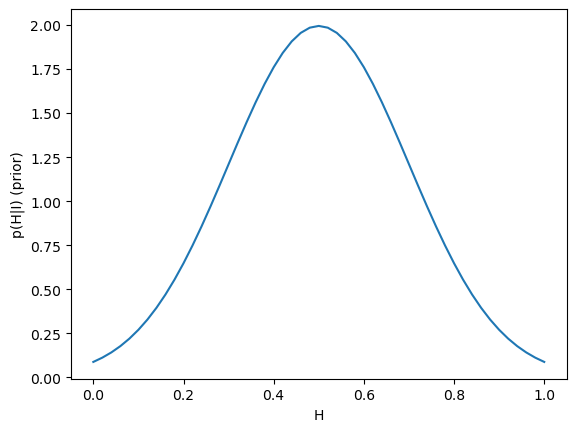

In [14]:
prior = priorNormal(H)
plt.plot(H, prior)
plt.xlabel("H")
plt.ylabel("p(H|I) (prior)")

Now let's multiply the likelihood with the new prior.

In [15]:
pn1 = priorNormal(H)*binom.pmf(1, 1, H)  # D=h
pn2 = priorNormal(H)*binom.pmf(2, 2, H)  # D=h,h
pn3 = priorNormal(H)*binom.pmf(2, 3, H)  # D=h,h,t

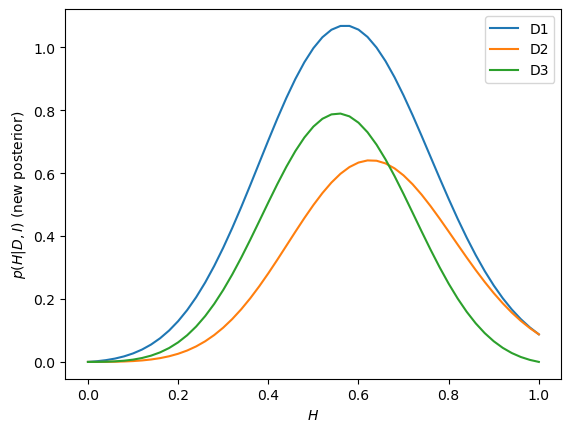

In [16]:
plt.plot(H, pn1, label="D1")
plt.plot(H, pn2, label="D2")
plt.plot(H, pn3, label="D3")
plt.xlabel("$H$")
plt.ylabel("$p(H|D,I)$ (new posterior)")
plt.legend()

The results are clearly different from the flat prior case.  Some non-Bayesian advocates (aka frequentists) argue that the Bayesian formalism is too subjective as the results depend heavily on the prior and can lead to biases.  Bayesians argue that you should always make use of all information available.  Scientists (most of who are now Bayesians) also argue that if your results depend heavily on your prior, you just don't have enough/good data.

Here let's take the coin-flip experiment, but pretend that $H=0.2$ and that you've now flipped the coin 1000 times.  So you expect approximately 200 heads and 800 tails.

In [17]:
H2  = np.arange(0, 1.001, 0.001)
pnX = binom.pmf(200, 1000, H2)  # D=200h, 800t

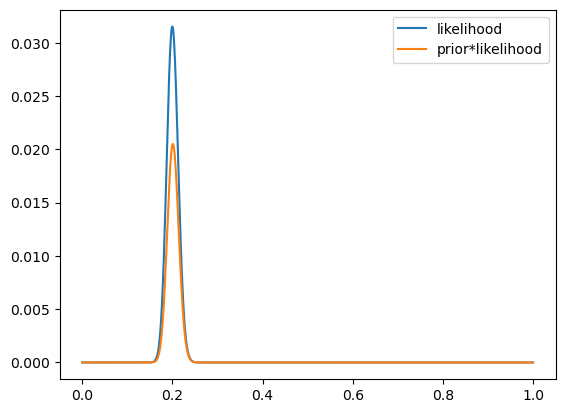

In [18]:
plt.plot(H2, pnX, label="likelihood")
plt.plot(H2, priorNormal(H2)*pnX, label="prior*likelihood")
plt.legend()

The two curves are not normalized, but you can see that they are approximately centered on 0.2 even though the prior was centered on 0.5.  Here, you have enough data such that your results are not too affected by your choice of prior.

In the example above, we took H=0.2 and assumed we ended up with 200 head and 800 tails.  Realistically, we won't expect to see such a nice result.  Let's do a simulation.  The function `np.random.random(n)` returns n numbers between [0,1] drawn from a uniform distribution.

In [19]:
np.random.random(10)

array([0.51619329, 0.9951549 , 0.7933311 , 0.73686838, 0.44565363,
       0.44468391, 0.67125744, 0.19944412, 0.80134714, 0.64014672])

We can use this to simulate a realistic sequence of coin flips with arbitrary values of H by setting all values above H to be 0 (tails) and below H to be 1 (heads).

In [20]:
n = 1000
h = 0.2
flipsim = np.where(np.random.random(n)>=h, 0, 1)
flipsim

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,

In [21]:
# since we took 1 to represent heads, the sum is simply the number of heads
nheads = flipsim.sum()
print(nheads, "heads", n-nheads, "tails")

190 heads 810 tails


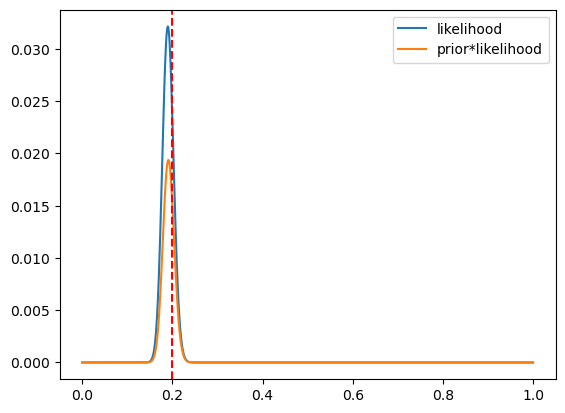

In [22]:
H2  = np.arange(0, 1.001, 0.001)
pnX = binom.pmf(nheads, 1000, H2)
plt.plot(H2, pnX, label="likelihood")
plt.plot(H2, priorNormal(H2)*pnX, label="prior*likelihood")
plt.legend()
plt.axvline(x=h, color='r', linestyle='--')